plt thresh
101 88
finish
110 87
finish


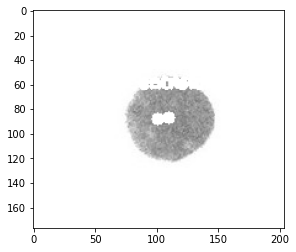

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import argparse

# img = cv2.imread(args["ipimage"]) r'foo55.jpg'
img = cv2.imread('test0401.jpg')#GRAYSCALE
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray_image,220,255,0)
plt.imshow(thresh)
print('plt thresh')
cv2.waitKey(0)
# find contours in the binary image
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# https://github.com/facebookresearch/maskrcnn-benchmark/issues/339
for c in contours:
    M = cv2.moments(c)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
#     cX = int(M["m10"] / M["m00"])
#     cY = int(M["m01"] / M["m00"])
    print(cX,cY)
    cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
    cv2.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    plt.imshow(img)
#     cv2.imshow("Image", img)
    cv2.waitKey(0)
    print('finish')
